# Introduction

### This notebook aims to explore the fundamental optimization algorithms used in machine learning, 
### focusing on gradient descent (GD), stochastic gradient (SGD), mini-batch SGD, and the Adam adaptive algorithm. 

### Through hands-on explorations and comparative analysis, you'll develop an intuitive and technical understanding of these methods.

In [12]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import load_breast_cancer
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
import time

#download data 
cancer = load_breast_cancer ()
X , y = cancer.data, cancer.target

# Informations sur le jeu de donnees
print (f" Nombre  d’exemples : {X. shape [0]} ")
print (f" Nombre de caracteristiques : {X. shape [1]} ")
print (f" Classes :{np. unique (y)}")
print (f" Distribution des  classes : {np. bincount (y)}")

 # Pre data treatement 
scaler = StandardScaler ()
X_scaled = scaler.fit_transform (X)

# Ajout d’une colonne de 1 pour le terme de biais
X_scaled = np.hstack((np.ones((X_scaled.shape[0],1)),X_scaled))

# Division en ensembles d’ e n t r a n e m e n t et de test
X_train , X_test , y_train , y_test = train_test_split ( X_scaled , y , test_size =0.2 , random_state =42)

print (f" Dimensions X_train :{ X_train . shape }")
print (f" Dimensions X_test :{ X_test . shape }")

 Nombre  d’exemples : 569 
 Nombre de caracteristiques : 30 
 Classes :[0 1]
 Distribution des  classes : [212 357]
 Dimensions ␣ X_train :␣(455, 31)
 Dimensions ␣ X_test :␣(114, 31)


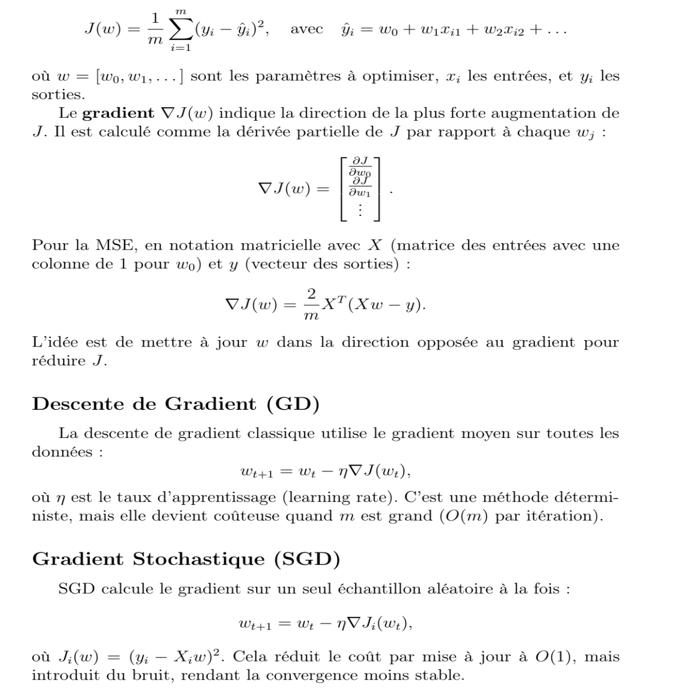

In [141]:
from IPython.display import display
from PIL import Image

gradient_course = Image.open("Gradient_decent.png").convert("RGB")
gradient_course = gradient_course.resize((700, 700))
display(gradient_course)

In [7]:
def sigmoid (z):

    z = np.clip(z,-500,500)
    return 1/(1+np.exp(-z))

In [ ]:
def compute_loss (X , y , theta ) :
    """ Calcule la fonction de perte logistique ( log loss ) """
    m = len(y)
    z = np.dot(X,theta)
    predictions = sigmoid(z)

    # numeric stability
    predictions = np.clip(predictions,1e-15 ,1-1e-15)

    loss = -1/m*np.sum(y*np.log(predictions)+(1-y)*np.log(1-predictions))
    return loss

In [10]:
def compute_accuracy (X , y , theta ):

    """Calcule la precision du modele"""
    
    predictions = sigmoid(np.dot(X,theta))
    predicted_classes=(predictions>=0.5).astype(int)
    return np.mean( predicted_classes == y)

In [130]:
def batch_gradient_descent (X , y , learning_rate=0.01 , epochs =100) :
    """ Descente de gradient classique ( batch ) """
    start_time = time . time ()
    m , n = X . shape
    theta = np . zeros ( n)
    losses = []

    for epoch in range ( epochs ) :
        # Calcul  predictions
        predictions = sigmoid ( np . dot (X , theta ))

        # Calcul gradient
        gradient = 1/ m * np . dot (X .T , ( predictions - y ))

        # Upgrade parameters
        theta = theta - learning_rate * gradient

        # Suivi de la perte
        loss = compute_loss (X , y , theta )
        losses . append ( loss )

        if epoch % 10 == 0:
            accuracy = compute_accuracy (X , y , theta )
            #print (f"Epoch{epoch}:Loss={loss:.4f} , Accuracy={accuracy:.4f}")


    duration = time.time()-start_time
    print (f" Temps d'execusion( Batch GD):{ duration :.2f} secondes")
    return theta , losses

In [131]:
def stochastic_gradient_descent (X , y , learning_rate =0.01 , epochs =100) :
    """ Descente de gradient stochastique ( SGD ) """
    start_time = time . time ()
    m , n = X . shape
    theta = np . zeros ( n)
    losses = []
    for epoch in range ( epochs ) :

        indices = np.random.permutation (m)
        X_shuffled = X [indices]
        y_shuffled = y [indices]

        epoch_losses = []

        for i in range (m ):
            # Selection d’un seul exemple
            x_i = X_shuffled [i]. reshape (1 , -1)
            y_i = y_shuffled [i]

            # Calcul de la p r d i c t i o n
            prediction = sigmoid ( np . dot ( x_i , theta ))

            # Calcul du gradient pour cet exemple
            gradient=np.dot(x_i.T,(prediction-y_i))

            # Mise jour des p a r a m t r e s
            theta = theta - learning_rate * gradient

            # Calcul de la perte pour suivi ( optionnel , peut très couteux )

            if i % 50 == 0:
                current_loss = compute_loss (X , y , theta )
                epoch_losses . append ( current_loss )
        # Moyenne des pertes sur l’époque
        avg_loss = np . mean ( epoch_losses ) if epoch_losses else  compute_loss (X, y, theta)
        losses.append( avg_loss )
        
        if epoch%10 == 0:
            accuracy = compute_accuracy (X , y , theta )
            #print (f" Epoch { epoch }: Loss={ avg_loss :.4f},Accuracy ={accuracy :.4f}")


    duration = time . time () - start_time
    print (f" Temps execution( SGD ):{ duration :.2f}secondes ")
    return theta , losses

In [132]:
def mini_batch_gradient_descent (X , y , learning_rate =0.01 , batch_size=32 , epochs =100) :
    """ Descente de gradient mini - batch """
    start_time = time.time ()
    m , n = X.shape
    theta = np.zeros(n)
    losses = []

    for epoch in range ( epochs ) :
        # data wipin 
        indices = np . random . permutation (m )
        X_shuffled = X [indices]
        y_shuffled = y [indices]

        epoch_losses = []
        # Traitement par mini - batches
        for i in range (0 , m , batch_size ):
            # S l e c t i o n d’un mini - batch
            X_batch = X_shuffled [i: i+ batch_size ]
            y_batch = y_shuffled [i: i+ batch_size ]
            batch_size_actual = len ( X_batch )
            # Calcul des predictions
            predictions = sigmoid ( np . dot ( X_batch , theta ) )

            # Calcul du gradient sur le mini - batch
            gradient = 1/ batch_size_actual * np . dot ( X_batch .T , (predictions - y_batch ))


            theta = theta - learning_rate * gradient

            # Calcul de la perte ( optionnel , peut tre c o t e u x )
            if i % (5 * batch_size ) == 0:
                current_loss = compute_loss (X , y , theta )
                epoch_losses . append ( current_loss )

            # Moyenne des pertes sur l’ poque
            avg_loss = np . mean ( epoch_losses ) if epoch_losses else compute_loss (X , y , theta )
            losses.append(avg_loss)

        if epoch % 10 == 0:
            accuracy = compute_accuracy (X , y , theta )
            #print (f"Epoch {epoch}: Loss={ avg_loss :.4f}, Accuracy={accuracy :.4f}")

    duration = time . time () - start_time
    print (f"Temps d’execution (Mini - Batch GD):{ duration:.2f} secondes")

    return theta , losses

### Model Valuation

In [86]:
n_epochs = 100
lr_batch = 0.1
lr_sgd = 0.01
lr_mini = 0.01
batch_size = 32

# E n t r a n e m e n t avec descente de gradient par batch
print ("\n === Descente de Gradient sur Batch  === ")
theta_batch , losses_batch = batch_gradient_descent ( X_train , y_train ,learning_rate = lr_batch , epochs = n_epochs )

# E n t r a n e m e n t avec descente de gradient stochastique
print ("\n === Descente de Gradient Stochastique === ")
theta_sgd , losses_sgd = stochastic_gradient_descent ( X_train , y_train ,learning_rate = lr_sgd , epochs = n_epochs )

16 # E n t r a n e m e n t avec descente de gradient par mini - batch
print ("\n === Descente de Gradient sur Mini Batch === ")
theta_mini , losses_mini = mini_batch_gradient_descent ( X_train , y_train ,learning_rate = lr_mini , batch_size = batch_size , epochs = n_epochs )


 === Descente de Gradient sur Batch  === 
 Temps d'execusion( Batch GD):0.07 secondes

 === Descente de Gradient Stochastique === 
 Temps execution( SGD ):1.35secondes 

 === Descente de Gradient sur Mini Batch === 
Temps d’execution (Mini - Batch GD):0.09 secondes



 === Resultat sur l'ensemble des tests=== 
 Precision ( Batch GD):0.9912
 Precision (SGD ):0.9825
 Precision(Mini - Batch GD):0.9912


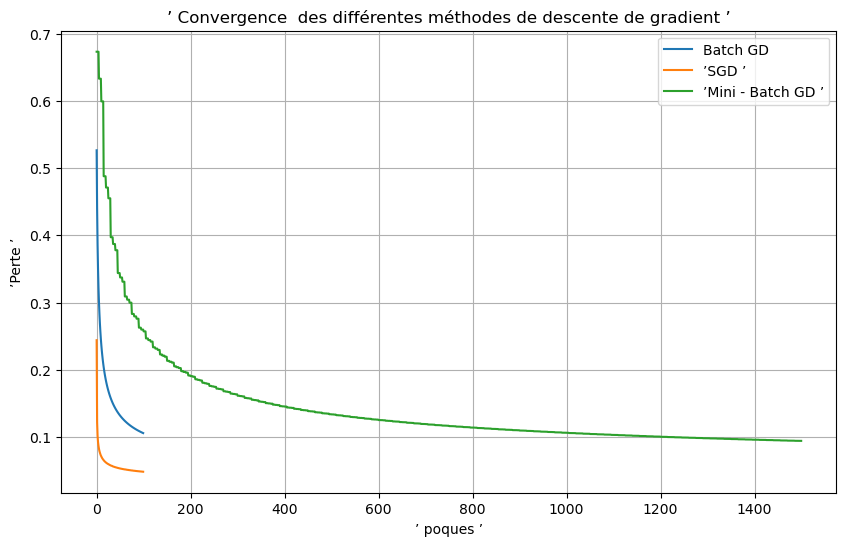

In [89]:
# valuation sur l’ensemble de test
acc_batch = compute_accuracy ( X_test , y_test , theta_batch )
acc_sgd = compute_accuracy ( X_test , y_test , theta_sgd )
acc_mini = compute_accuracy ( X_test , y_test , theta_mini )

print ("\n === Resultat sur l'ensemble des tests=== ")
print (f" Precision ( Batch GD):{ acc_batch :.4f}")
print (f" Precision (SGD ):{ acc_sgd :.4f}")
print (f" Precision(Mini - Batch GD):{ acc_mini :.4f}")

# Visualisation de la convergence
plt.figure ( figsize =(10 , 6) )
plt.plot ( losses_batch , label ='Batch GD')
plt.plot( losses_sgd,label ='’SGD ’')
plt.plot ( losses_mini , label ='’Mini - Batch GD ’')
plt.xlabel ('’ poques ’')
plt.ylabel('’Perte ’')
plt.title('’ Convergence  des différentes méthodes de descente de gradient ’')
plt.legend()
plt.grid( True )
plt.savefig('convergence.pdf')
plt.show()

## Exercice 1 

##### Modifiez le code pour tester différents taux d’apprentissage pour la descente de gradient par batch (par exemple, η ∈ {0.001, 0.01, 0.1, 1.0}).

 Temps d'execusion( Batch GD):0.04 secondes
 Temps d'execusion( Batch GD):0.02 secondes
 Temps d'execusion( Batch GD):0.00 secondes
 Temps d'execusion( Batch GD):0.02 secondes


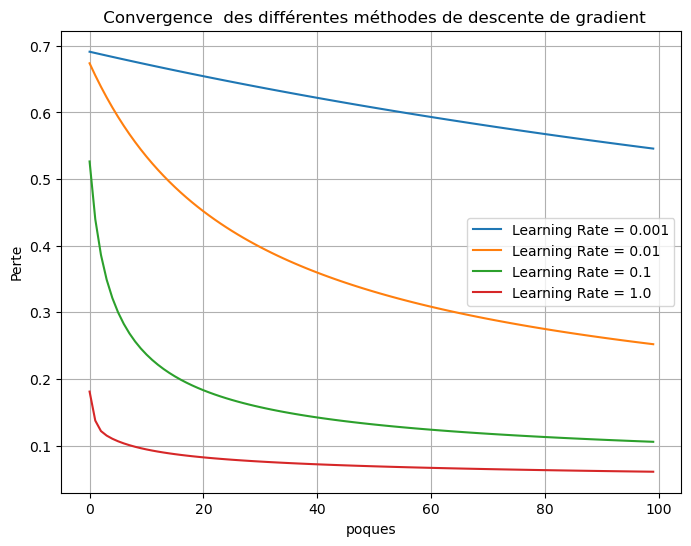

In [121]:
learning_rates = [0.001, 0.01, 0.1, 1.0]

losses_learning={}

for i in learning_rates:
    _, losses = batch_gradient_descent(X_train, y_train,i)
    losses_learning[i] = losses

plt.figure(figsize=(8,6))

for lr, losses in losses_learning.items():
    plt.plot(losses, label=f"Learning Rate = {lr}")

plt.xlabel ('poques')
plt.ylabel('Perte')
plt.title(' Convergence  des différentes méthodes de descente de gradient')
plt.legend()
plt.grid( True )
plt.show()



## Exercice 2 

#### Étudier l’impact de la taille du mini-batch sur les performances et la vitesse de convergence.

 Temps d'execusion( Batch GD):0.05 secondes
 Temps d'execusion( Batch GD):0.02 secondes
 Temps d'execusion( Batch GD):0.00 secondes
 Temps d'execusion( Batch GD):0.01 secondes
 Temps d'execusion( Batch GD):0.01 secondes


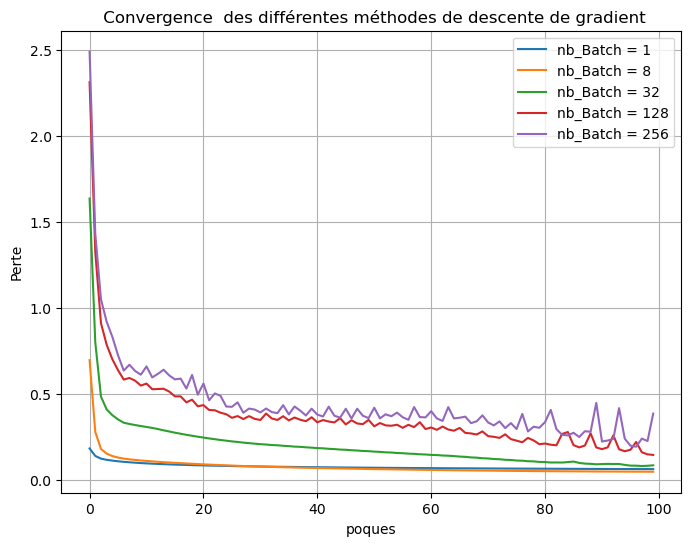

In [128]:
mini_batch_test=[1, 8, 32, 128, 256]

losses_mini_batch={}

for i in mini_batch_test:
    _, losses = batch_gradient_descent(X_train, y_train,i)
    losses_mini_batch[i] = losses

plt.figure(figsize=(8,6))

for batch, losses in losses_mini_batch.items():

    plt.plot(losses, label=f"nb_Batch = {batch}")

plt.xlabel ('poques')
plt.ylabel('Perte')
plt.title(' Convergence  des différentes méthodes de descente de gradient')
plt.legend()
plt.grid( True )
plt.show()


## Exrercice 3

##### Implémenter la descente de gradient avec momentum et comparer ses performances avec les méthodes étudiées précédemment.

##### La descente de gradient avec momentum est définie par :

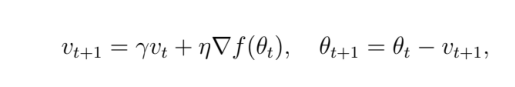

In [ ]:
img = plt.imread('momentum_formula.png')

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Désactive les axes pour une meilleure visualisation
plt.show()

In [103]:
def momentum_gradient_descent (X , y,  momentum_rate, learning_rate= 0.01,  epochs =100) :
    """ Descente de gradient classique ( batch ) """
    start_time = time . time ()
    m , n = X . shape
    theta = np . zeros (n)
    losses = []
    momentum=np . zeros (n)

    for epoch in range ( epochs ) :
        # Calcul  predictions
        predictions = sigmoid ( np . dot (X , theta ))

        # Calcul gradient
        gradient = 1/ m * np . dot (X .T , ( predictions - y ))

        #momentum 
        momentum=momentum_rate * momentum + (learning_rate * gradient)
        # Upgrade parameters
        theta = theta - momentum

        # Suivi de la perte
        loss = compute_loss (X , y , theta )
        losses . append ( loss )

        if epoch % 10 == 0:
            accuracy = compute_accuracy (X , y , theta )
            #print (f"Epoch{epoch}:Loss={loss:.4f} , Accuracy={accuracy:.4f}")


    duration = time.time()-start_time
    print (f" Temps d'execusion( Batch GD):{ duration :.2f} secondes")
    return theta , losses

 Temps d'execusion( Batch GD):0.17 secondes
 Temps d'execusion( Batch GD):0.02 secondes
 Temps d'execusion( Batch GD):0.01 secondes
 Temps d'execusion( Batch GD):0.01 secondes


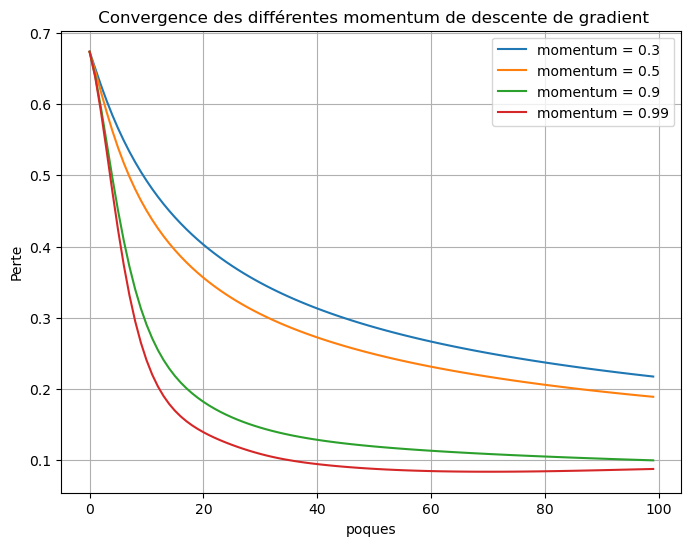

In [124]:
momentum_test=[0.3, 0.5, 0.9, 0.99]

losses_momentum={}

for i in momentum_test:
    _, losses = momentum_gradient_descent(X_train, y_train,i)
    losses_momentum[i] = losses

plt.figure(figsize=(8,6))

for moemnt, losses in losses_momentum.items():

    plt.plot(losses, label=f"momentum = {moemnt}")

plt.xlabel ('poques')
plt.ylabel('Perte')
plt.title(' Convergence des différentes momentum de descente de gradient')
plt.legend()
plt.grid( True )
plt.show()


### we can explore other solver like ADAM

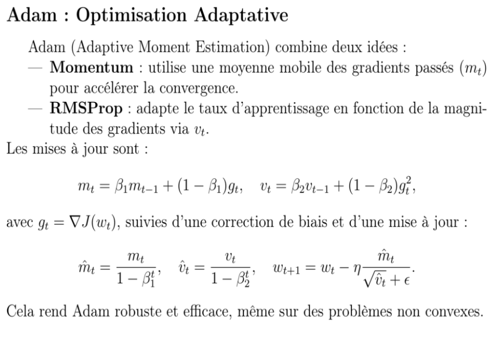

In [140]:
from IPython.display import display
from PIL import Image

gradient_course = Image.open("Adam_solver.png").convert("RGB")
gradient_course = gradient_course.resize((500, 350))
display(gradient_course)

In [134]:
def adam (X , y , lr =0.001 , batch_size =32 , epochs =100) :
    m , n = X . shape
    w = np . zeros ( n )
    mt = np . zeros ( n )
    vt = np . zeros ( n )
    beta1 , beta2 , eps = 0.9 , 0.999 , 1e-8
    losses = []

    for t in range (1 , epochs +1) :
        indices = np . random . permutation ( m )
        for start in range (0 , m , batch_size ) :
            batch = slice ( start , min ( start + batch_size , m ) )
            X_batch = X[ batch ]
            y_batch = y[ batch ]
            y_pred = np.dot(X_batch, w)
            gradient =np.dot(X_batch.T, (y_pred-y_batch)) / len(y_batch )

            mt = beta1 * mt + (1 - beta1 ) * gradient
            vt = beta2 * vt + (1 - beta2 ) * ( gradient ** 2)
            mt_hat = mt / (1 - beta1 ** t )
            vt_hat = vt / (1 - beta2 ** t )
            w -= lr * mt_hat / ( np . sqrt ( vt_hat ) + eps )
        losses . append ((( X @ w - y ) **2) . mean () )
    return w , losses

 Temps d'execusion( Batch GD):0.15 secondes
 Temps execution( SGD ):0.97secondes 
Temps d’execution (Mini - Batch GD):0.09 secondes


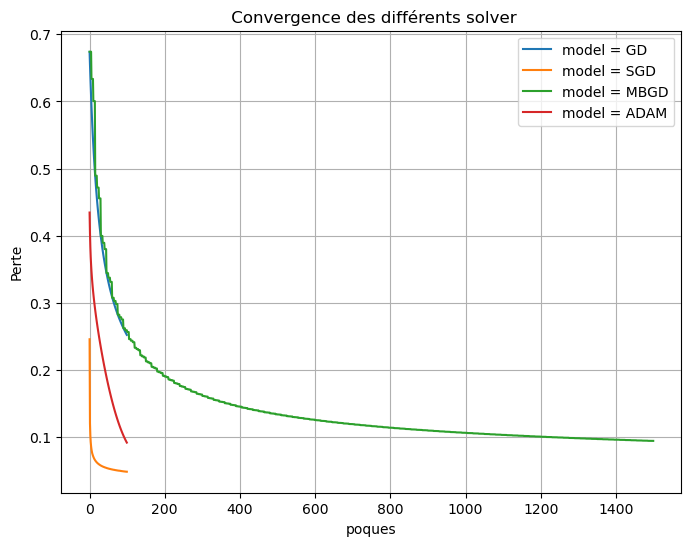

In [139]:
models={
    "GD" : (batch_gradient_descent, ),
    "SGD" : (stochastic_gradient_descent, ),
    "MBGD" : (mini_batch_gradient_descent, ),
    "ADAM" : (adam, )
}

for name, model in models.items():
    _, losses = model[0](X_train, y_train)
    tmp_list=list(models[name])
    tmp_list.append(losses)
    models[name]=tuple(tmp_list)

plt.figure(figsize=(8,6))

for model, losses in models.items():

    plt.plot(losses[1], label=f"model = {model}")

plt.xlabel ('poques')
plt.ylabel('Perte')
plt.title(' Convergence des différents solver')
plt.legend()
plt.grid( True )
plt.show()